# EDA

In [1]:
from function import *

---

### 1. Overall information

In [2]:
# load data
train = pd.read_csv('data/coupon_detail_train.csv', index_col = 0)

In [3]:
# check shape
print('train shape :', train.shape) 

train shape : (168996, 6)


In [4]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168996 entries, 0 to 168995
Data columns (total 6 columns):
ITEM_COUNT         168996 non-null int64
I_DATE             168996 non-null object
SMALL_AREA_NAME    168996 non-null object
PURCHASEID_hash    168996 non-null object
USER_ID_hash       168996 non-null object
COUPON_ID_hash     168996 non-null object
dtypes: int64(1), object(5)
memory usage: 9.0+ MB


In [5]:
# check null
train.isnull().any()

ITEM_COUNT         False
I_DATE             False
SMALL_AREA_NAME    False
PURCHASEID_hash    False
USER_ID_hash       False
COUPON_ID_hash     False
dtype: bool

In [6]:
# Unique
print('train unique 갯수')
for i in range(6):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
ITEM_COUNT : 32개
I_DATE : 166422개
SMALL_AREA_NAME : 55개
PURCHASEID_hash : 168996개
USER_ID_hash : 22782개
COUPON_ID_hash : 19368개


---

### 2. X data

#### 2.1 Category

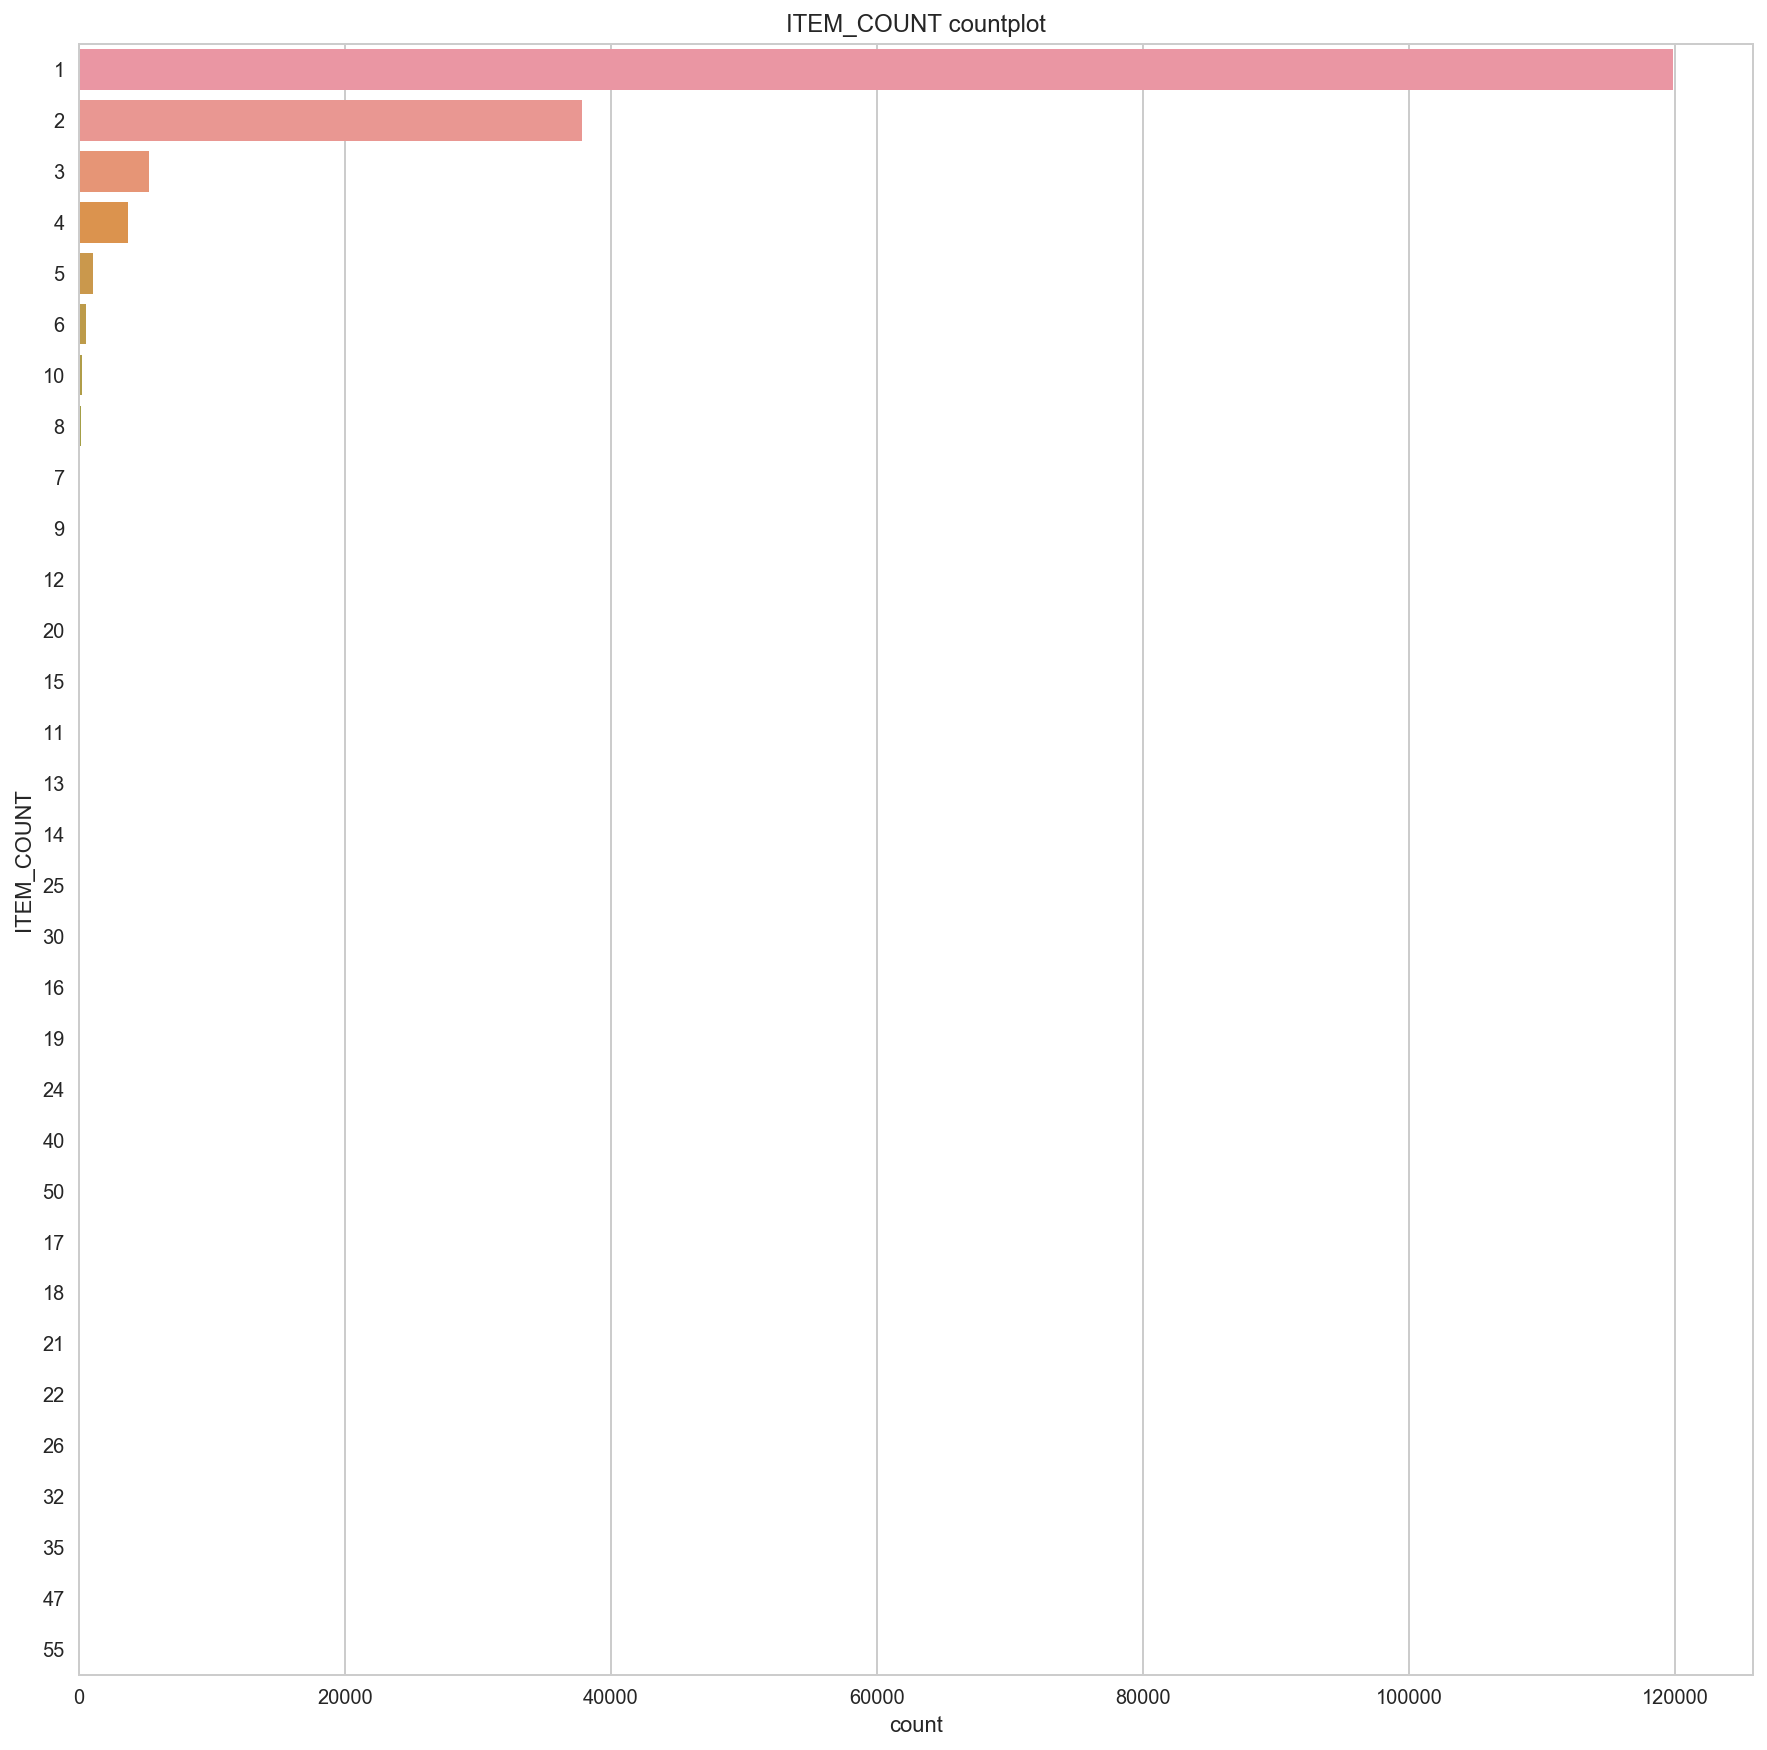

In [7]:
# ITEM_COUNT countplot
plt.figure(figsize=(15, 15))
sns.countplot(y = 'ITEM_COUNT', data = train, order = train['ITEM_COUNT'].value_counts().index)
plt.title('ITEM_COUNT countplot')
plt.show()

In [8]:
# ITEM_COUNT groupby
ITEM_COUNT = train.groupby("ITEM_COUNT").size().reset_index(name='counts')
ITEM_COUNT = ITEM_COUNT.sort_values(by=['counts'], ascending=False)
ITEM_COUNT = ITEM_COUNT.reset_index(drop=True)
ITEM_COUNT['ratio'] = (ITEM_COUNT['counts']/sum(ITEM_COUNT['counts'])*100)
ITEM_COUNT.head(10)

,ITEM_COUNT,counts,ratio
0,1,119832,70.908187
1,2,37869,22.408223
2,3,5252,3.107766
3,4,3717,2.199460
4,5,1085,0.642027
5,6,549,0.324860
6,10,245,0.144974
7,8,174,0.102961
8,7,137,0.081067
9,9,36,0.021302


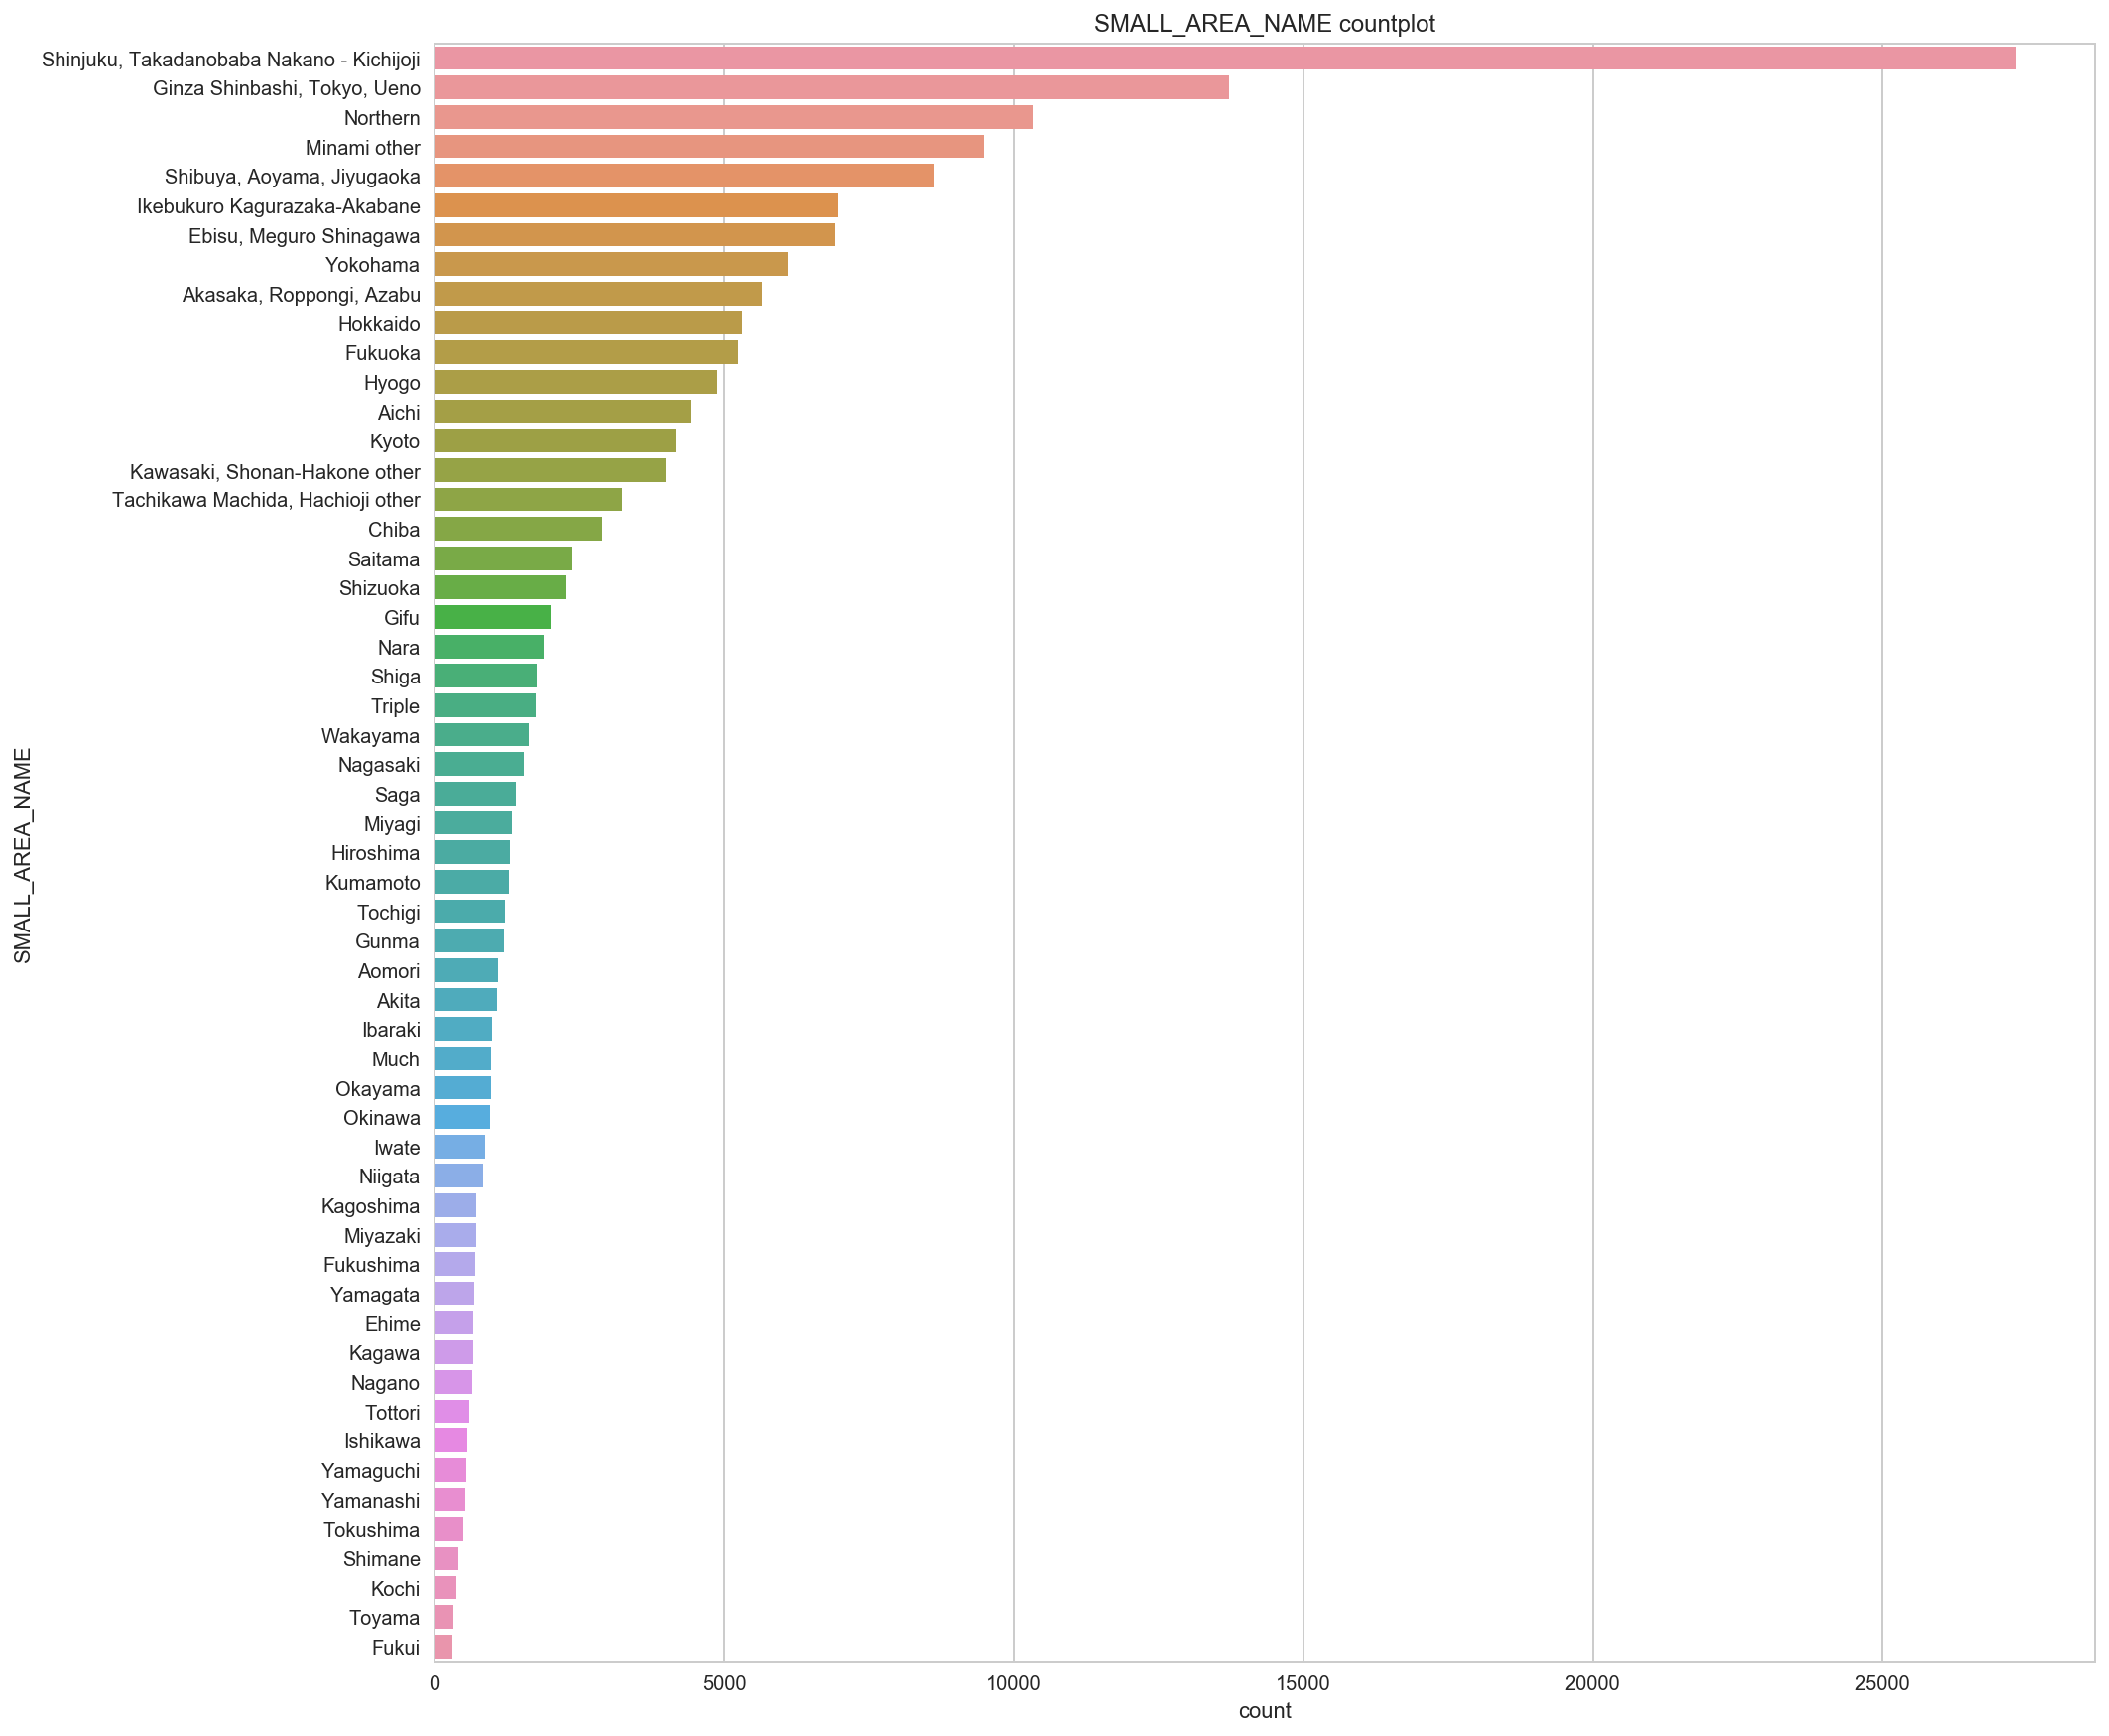

In [9]:
# SMALL_AREA_NAME countplot
plt.figure(figsize=(15, 15))
sns.countplot(y = 'SMALL_AREA_NAME', data = train, order = train['SMALL_AREA_NAME'].value_counts().index)
plt.title('SMALL_AREA_NAME countplot')
plt.show()

In [10]:
# SMALL_AREA_NAME groupby
SIA= train.groupby('SMALL_AREA_NAME').size().reset_index(name='counts')
SIA = SIA.sort_values(by=['counts'], ascending=False)
SIA = SIA.reset_index(drop=True)
SIA['ratio'] = (SIA['counts']/sum(ITEM_COUNT['counts'])*100)
SIA.head(10)

,SMALL_AREA_NAME,counts,ratio
0,"Shinjuku, Takadanobaba Nakano - Kichijoji",27309,16.159554
1,"Ginza Shinbashi, Tokyo, Ueno",13719,8.117944
2,Northern,10334,6.114938
3,Minami other,9493,5.617293
4,"Shibuya, Aoyama, Jiyugaoka",8627,5.104855
5,Ikebukuro Kagurazaka-Akabane,6973,4.126133
6,"Ebisu, Meguro Shinagawa",6920,4.094771
7,Yokohama,6098,3.608369
8,"Akasaka, Roppongi, Azabu",5661,3.349783
9,Hokkaido,5311,3.142678


---

#### 2.2 ID (hash)

In [11]:
# PURCHASEID groupby
PURCHASEID_hash= train.groupby("PURCHASEID_hash").size().reset_index(name='counts')
PURCHASEID_hash = PURCHASEID_hash.sort_values(by=['counts'], ascending=False)
PURCHASEID_hash = PURCHASEID_hash.reset_index(drop=True)
PURCHASEID_hash.head(5)

,PURCHASEID_hash,counts
0,0000655d8c1e67679c3c1a8887a97d10,1
1,aa768e83877cc9af89d2084b2b7f7160,1
2,aa76c10b5fc8341ef6f1d24a3f298530,1
3,aa76c7509f9c0473e0795781b36ff979,1
4,aa7739c3e38cd054bf4b0e4fbe9fab95,1


In [12]:
# USER_ID groupby
USER_ID = train.groupby("USER_ID_hash").size().reset_index(name='counts')
USER_ID = USER_ID.sort_values(by=['counts'], ascending=False)
USER_ID = USER_ID.reset_index(drop=True)
USER_ID.head(5)

,USER_ID_hash,counts
0,acd5e20541a5177e039835cef949d38d,101
1,01f61f5948da9c6c47bc47e6a959d48c,89
2,8a74bbcbdf2290988e92b4f0a52e57a7,87
3,e5ce4e00a1d90a6951940fea4acdd61b,86
4,e229db6f4d3554b8b96a8c04582b50eb,86


In [13]:
# USER_ID groupby
COUPON_ID = train.groupby("COUPON_ID_hash").size().reset_index(name='counts')
COUPON_ID = COUPON_ID.sort_values(by=['counts'], ascending=False)
COUPON_ID = COUPON_ID.reset_index(drop=True)
COUPON_ID.head(5)

,COUPON_ID_hash,counts
0,a262c7ff56a5cd3de3c5c40443f3018c,5760
1,3d9029d3ec66802b11ee2645dc16e8cb,1511
2,09411858ae07c0be91aeeddacf4556b4,1016
3,7fc6567f470af5356ae97097dbe18486,863
4,bf69bd9e0e26fa1f62243d1fcada38f1,663


---

#### 2.3 Date

In [14]:
train["I_DATE"] = pd.to_datetime(train["I_DATE"]) # date_time으로 변환
train["I_YEAR"] = train["I_DATE"].dt.year # 년
train["I_MONTH"] = train["I_DATE"].dt.month # 월
train["I_WEEKDAY"] = train["I_DATE"].dt.weekday # 일
train["I_HOUR"] = train["I_DATE"].dt.hour # 시간
train.tail()

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,I_YEAR,I_MONTH,I_WEEKDAY,I_HOUR
168991,1,2012-02-07 12:14:50,Ikebukuro Kagurazaka-Akabane,84b0c66349ae3c807f1d4601bfc0e8f6,280f0cedda5c4b171ee6245889659571,6eac7a7e347c563e5e00086f5eb47903,2012,2,1,12
168992,1,2012-02-28 15:43:21,"Ginza Shinbashi, Tokyo, Ueno",f7b2b854457ae6ece44be04c32520064,280f0cedda5c4b171ee6245889659571,a406e389e35e1140e4bc9b472d8258df,2012,2,1,15
168993,1,2012-03-19 12:11:16,"Ginza Shinbashi, Tokyo, Ueno",e12f28eb208f5466dede7a7cb2fc566b,280f0cedda5c4b171ee6245889659571,36addcc4b958135895c859d8783e3cd2,2012,3,0,12
168994,2,2012-04-12 12:27:34,"Shinjuku, Takadanobaba Nakano - Kichijoji",bcade77b186543a4820b3a6e3c06ad2f,280f0cedda5c4b171ee6245889659571,cb0244705306aafccc47bfe62ece39d3,2012,4,3,12
168995,1,2012-05-09 12:12:26,"Shinjuku, Takadanobaba Nakano - Kichijoji",fec51967a2f8135aa929cf2b5cc8722c,280f0cedda5c4b171ee6245889659571,31a605db6db5ad3fa3b2d4cf69ae3272,2012,5,2,12


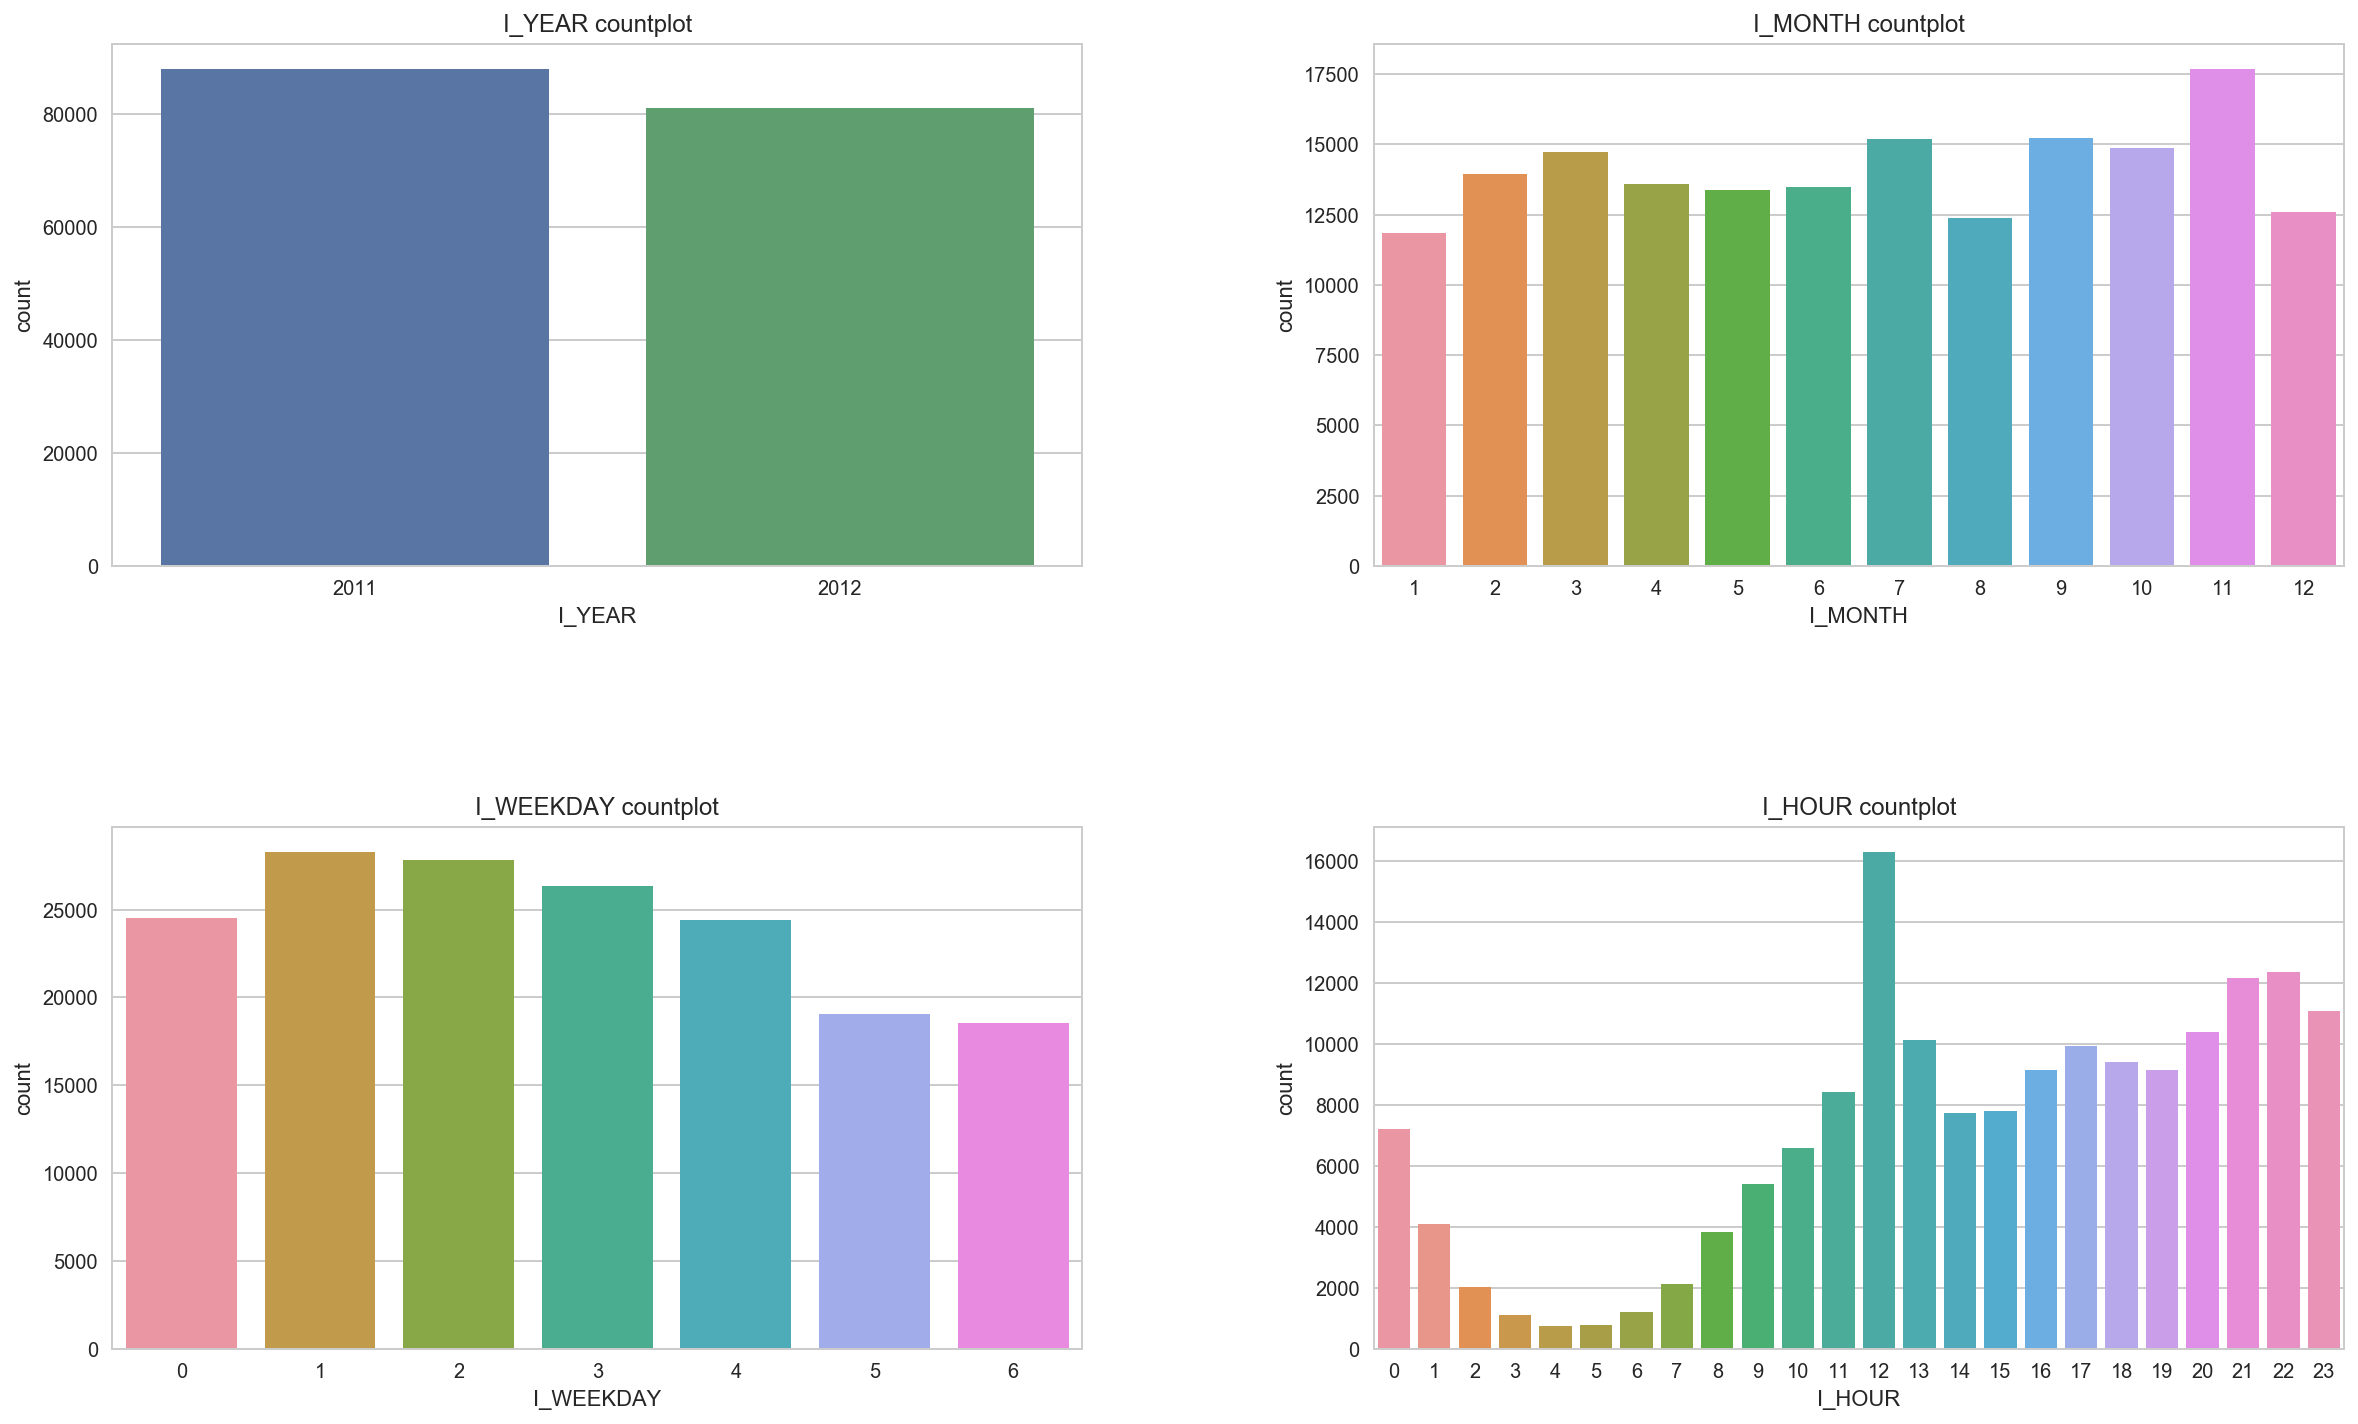

In [15]:
# countplot
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2,2,i-5)
    sns.countplot(x = train.columns[i], data = train)
    plt.title('{} countplot'.format(train.columns[i]))
    
plt.show()

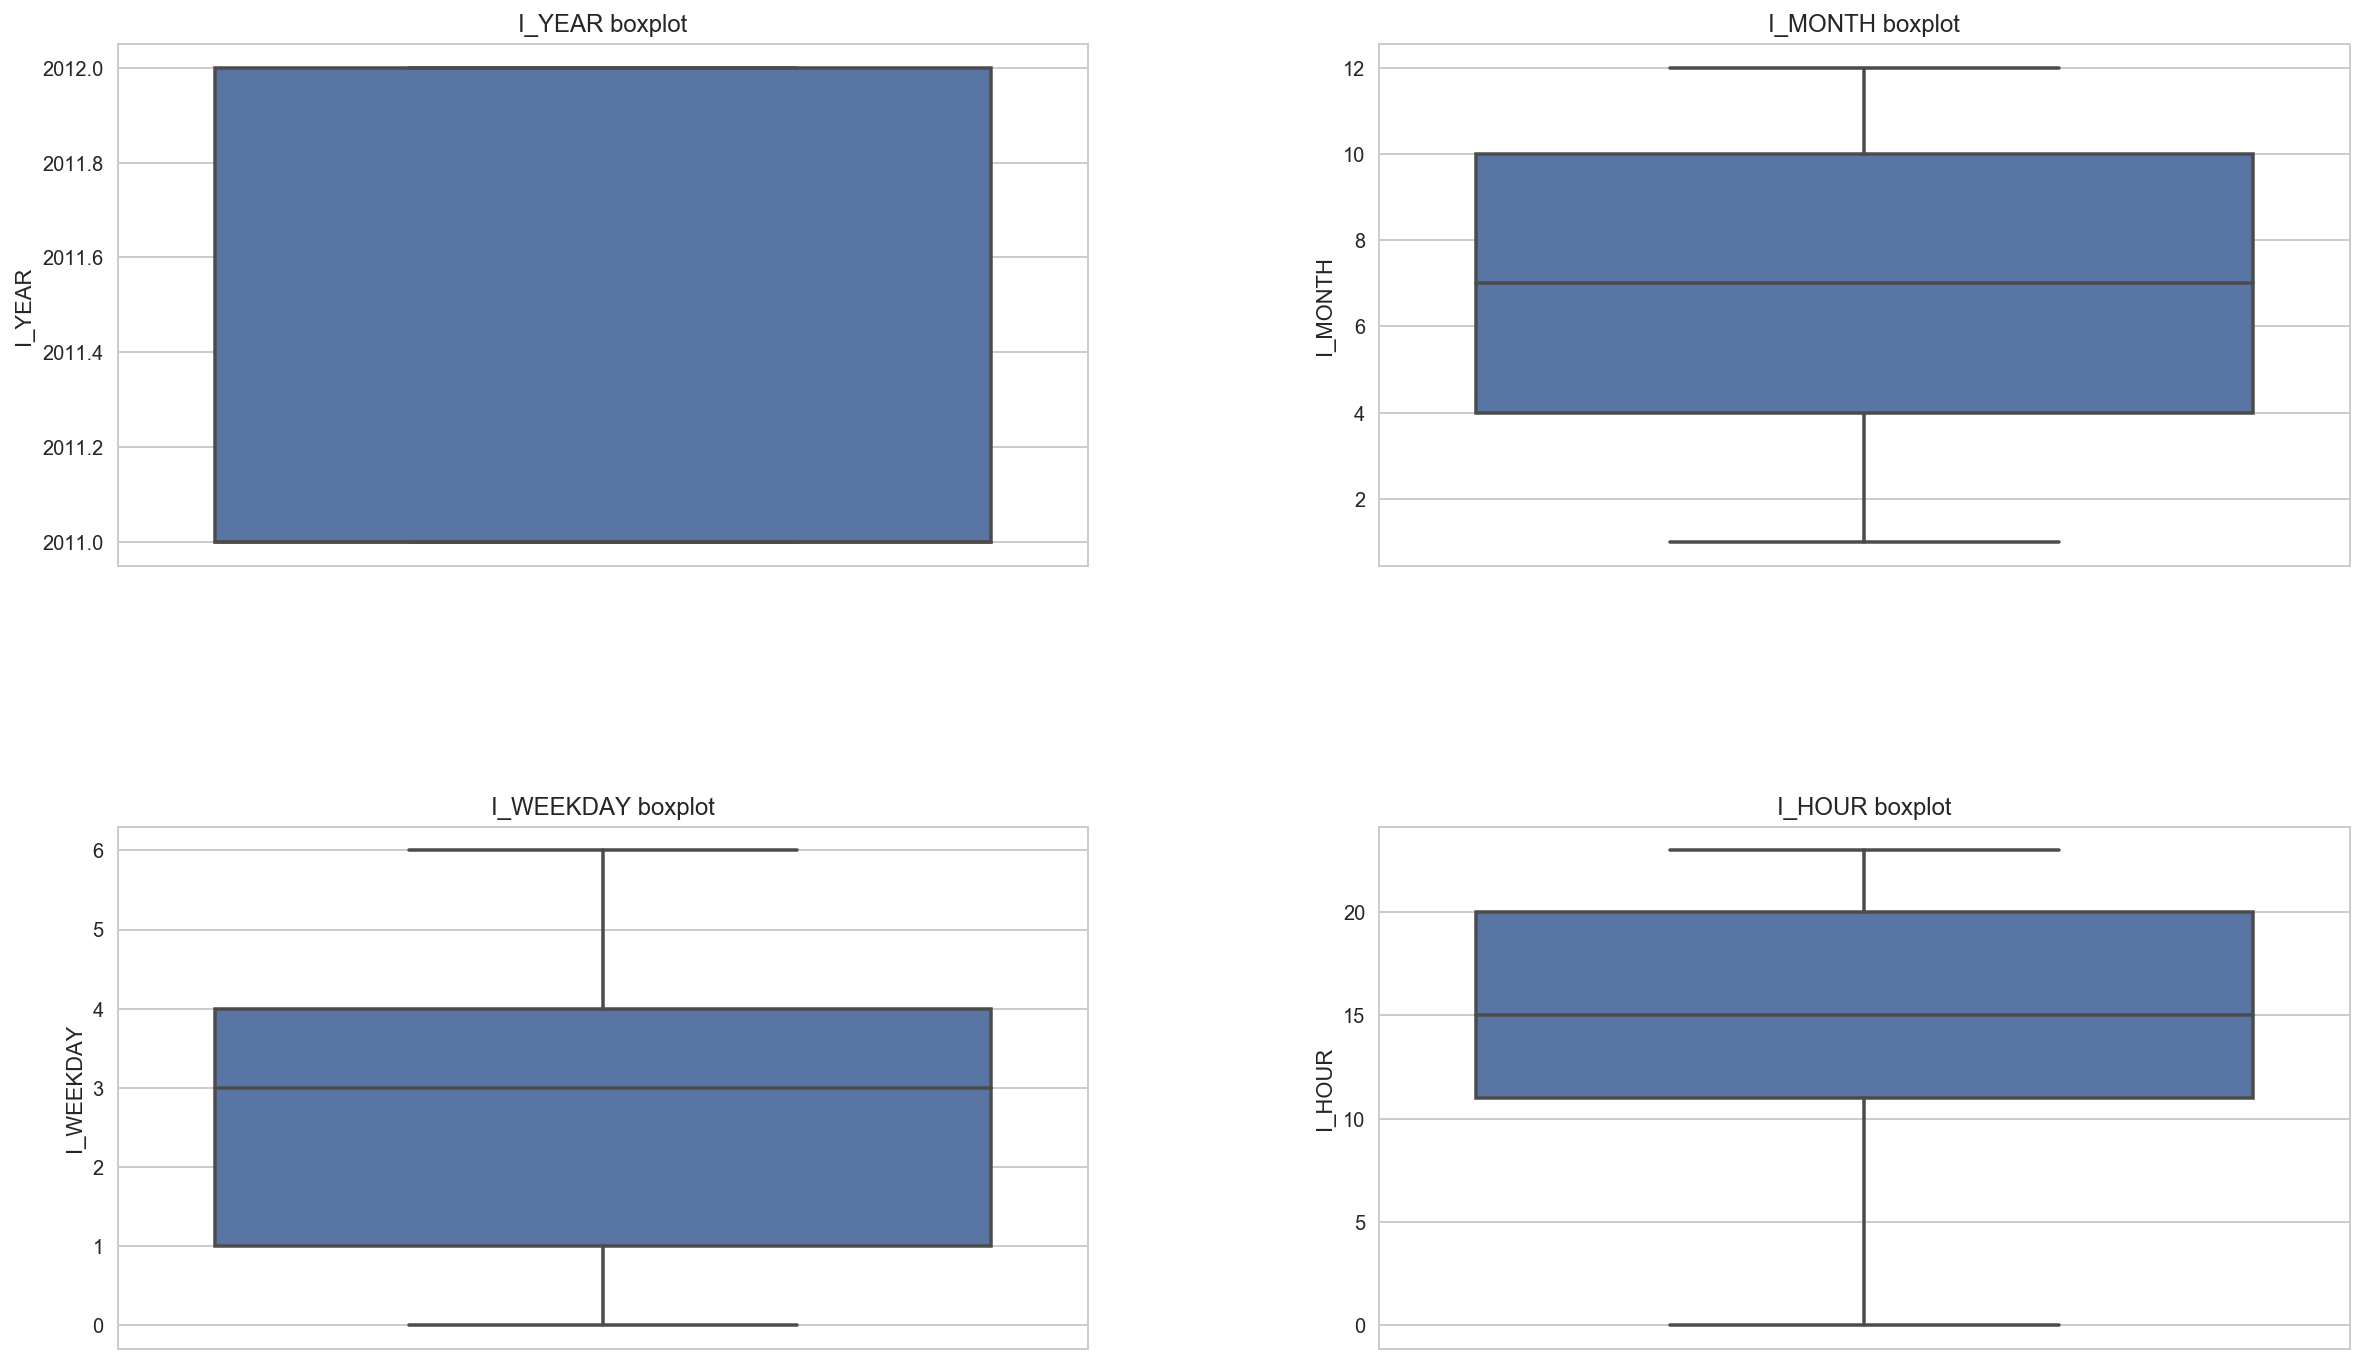

In [16]:
# boxplot
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2,2,i-5)
    sns.boxplot(y = train.columns[i], data = train)
    plt.title('{} boxplot'.format(train.columns[i]))
    
plt.show()

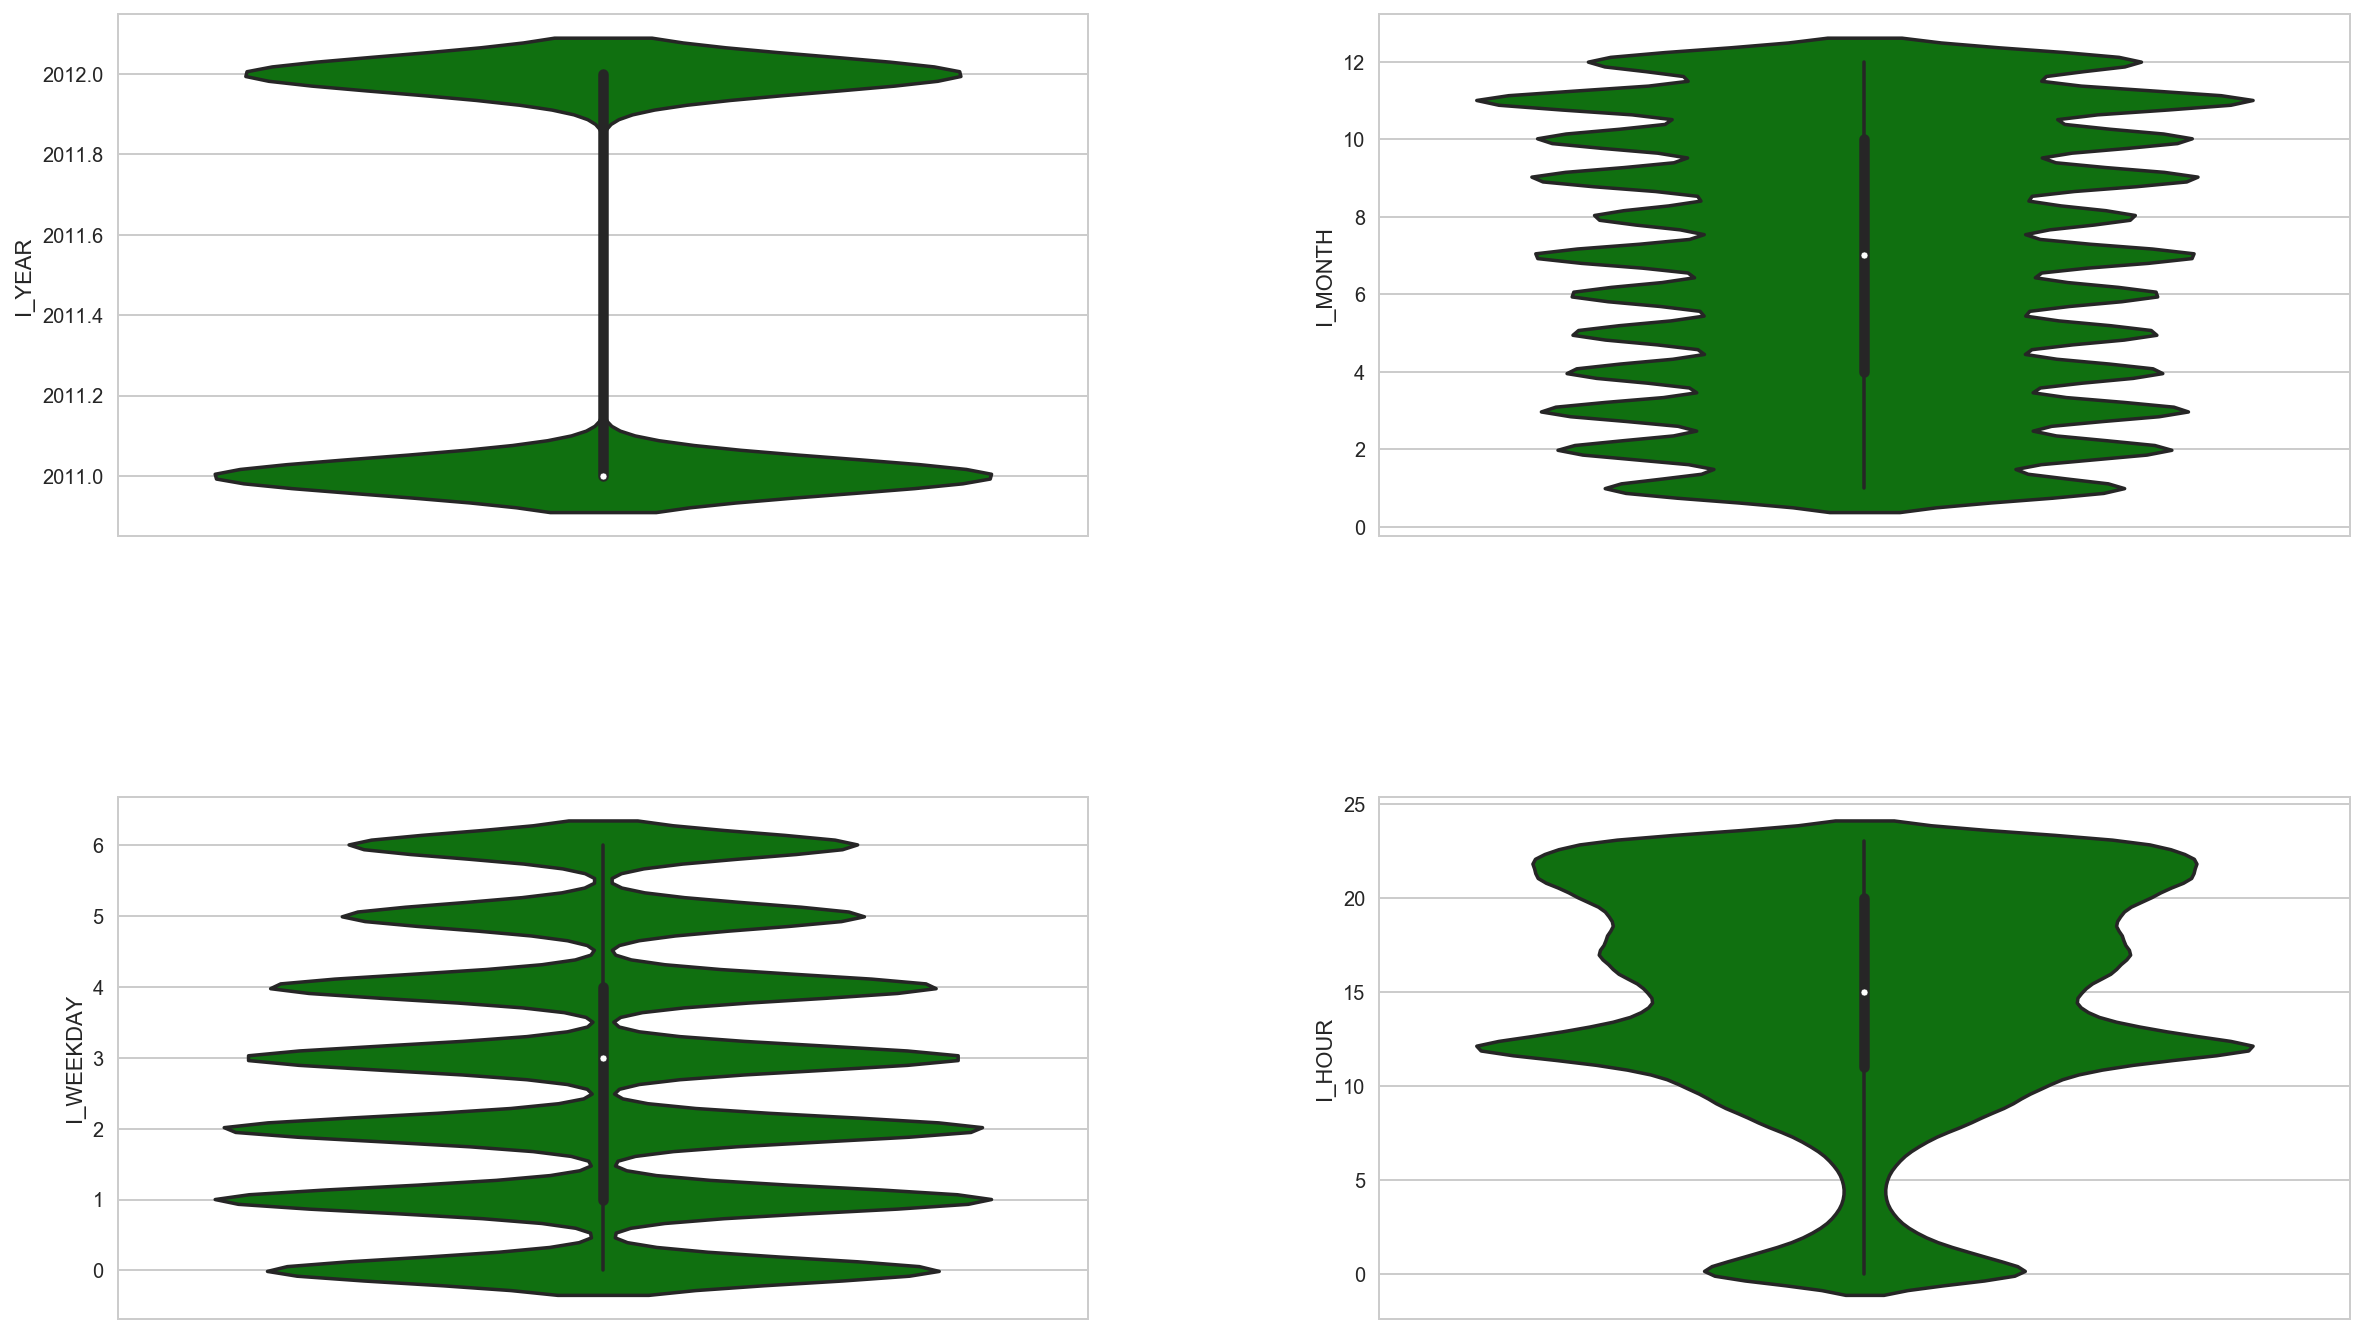

In [17]:
# violinplot
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2,2,i-5)
    sns.violinplot(y = train.columns[i], data = train, color = 'green')
    
plt.show()

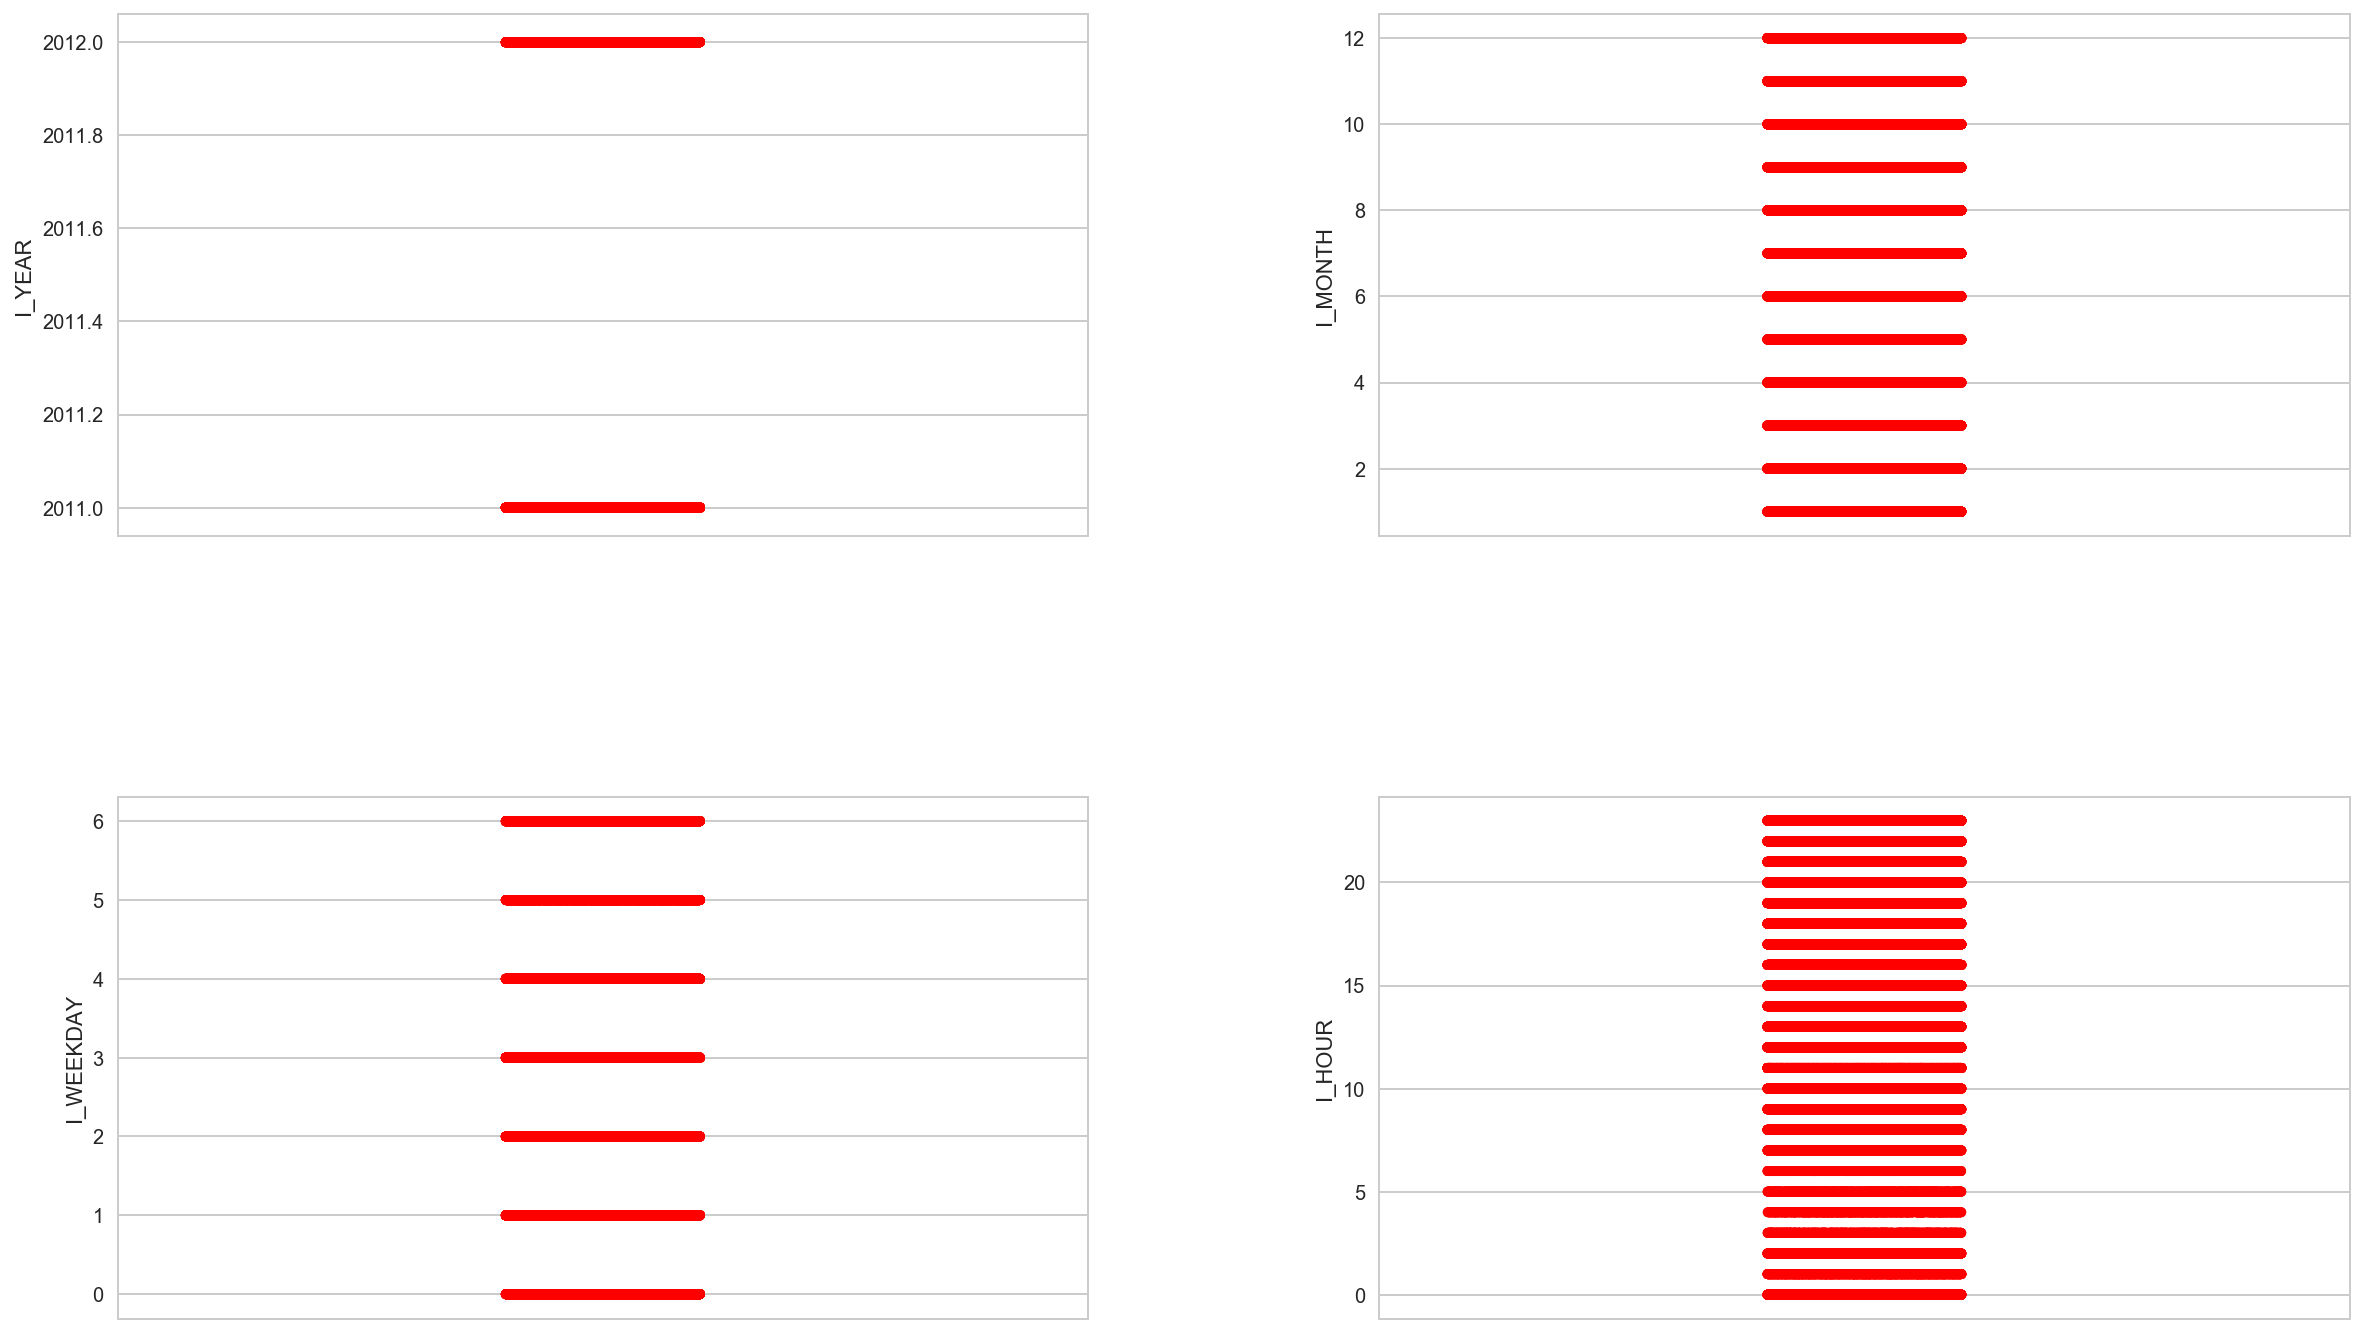

In [18]:
# stripplot
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2,2,i-5)
    sns.stripplot(y = train.columns[i], data = train, color = 'red', jitter = True)
    
plt.show()

In [19]:
# 데이터 재정렬
categorical = ['ITEM_COUNT', 'SMALL_AREA_NAME']
continuous = ['PURCHASEID_hash', 'USER_ID_hash', 'COUPON_ID_hash']
date = ['I_YEAR', 'I_MONTH', 'I_WEEKDAY', 'I_HOUR']

# train data
train_data = pd.concat([train[categorical], train[continuous], train[date]], axis = 1)

# csv 저장
train_data.to_csv('data/coupon_detail_train.csv', index = 0)